In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
(X_train,y_train),(X_test,y_test)=load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("There are ", len(X_train), "images in the training dataset")     # checking total number of records / data points available in the X_train dataset
print("There are ", len(X_test), "images in the test dataset")     # checking total number of records / data points available in the X_test dataset

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

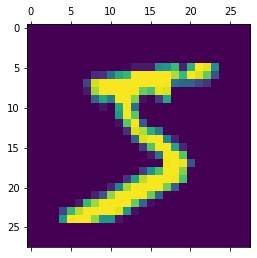

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

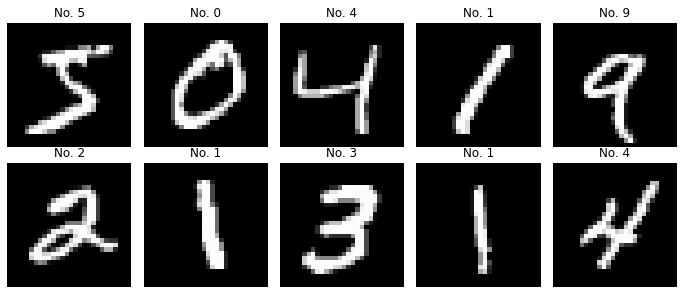

In [ ]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.1, 'hspace':0.06}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
#Defining a model
model=tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4877 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3060 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2854 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2751 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2672 - accuracy: 0.9258


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 900us/step - loss: 0.2656 - accuracy: 0.9255


[0.2656155824661255, 0.9254999756813049]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.3371215e-05, 9.6971653e-11, 4.5017725e-05, 1.1867642e-02,
       8.5475642e-07, 9.2009810e-05, 1.1614696e-09, 7.2944015e-01,
       7.7983153e-05, 6.4298511e-04], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

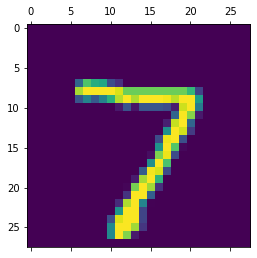

In [ ]:
plt.matshow(X_test[0])

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                           tf.keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                           tf.keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3738 - accuracy: 0.8990
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1556 - accuracy: 0.9554
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1134 - accuracy: 0.9658
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0869 - accuracy: 0.9737
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0708 - accuracy: 0.9788


In [ ]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9747


[0.08714332431554794, 0.9746999740600586]

In [ ]:
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_mnist.h5 
